In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [40]:
f_f=pd.read_csv("forestfires.csv",delimiter=',')
f_f.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [41]:
#lets create first MLP in keras
from keras.layers import Dense
from keras.models import Sequential

In [42]:
f_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [43]:
#lets drop out the duplicates and unneccseary columns
f_f[f_f.duplicated()].shape

(8, 31)

In [44]:
# drop the duplicated columns
f_f.drop_duplicates().reset_index(drop=True)
f_f

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [45]:
# converting the dataframe into the csv file
f_f.to_csv ('f_f.csv',index=False,sep=',',header=False)
f_f.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [46]:
# lets drop the month and day cloumns form the f_f csv file
f_f1 = f_f.drop(columns= ['month','day'],axis=1)
f_f1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [47]:
f_f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [48]:
# lets check the features of the f_f1 file
features=f_f1.columns
print(features)

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')


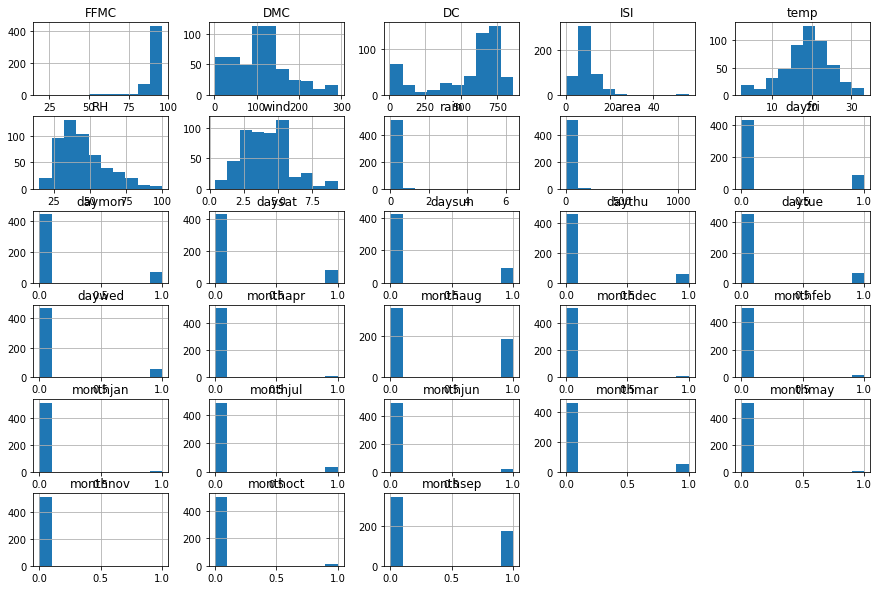

In [49]:
# lets polt the indiviual featurs
import matplotlib.pyplot as plt
f_f1[features].hist(figsize=(15,10))
plt.show()

In [50]:
# lets split the featur columns for easier processing ,since from cloumn 10 are the on hot coded fetaures lest discard it at a moment
features1=f_f1.iloc[:,0:9]
print(features1)

     FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..    ...    ...    ...   ...   ...  ..   ...   ...    ...
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 9 columns]


In [51]:
# lets use the scaling to bring it to the standard values
from  sklearn.preprocessing import MinMaxScaler
Mscale=MinMaxScaler()
f_f_2=pd.DataFrame(Mscale.fit_transform(f_f1.iloc[:,0:9]))
f_f_2

,0,1,2,3,4,5,6,7,8
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000


In [52]:
# now lets consider the rest of the f_f_1 coulnms for the process which are onehot encoded
df2=f_f1.iloc[:,9:]
print(df2)

     dayfri  daymon  daysat  daysun  daythu  daytue  daywed  monthapr  \
0         1       0       0       0       0       0       0         0   
1         0       0       0       0       0       1       0         0   
2         0       0       1       0       0       0       0         0   
3         1       0       0       0       0       0       0         0   
4         0       0       0       1       0       0       0         0   
..      ...     ...     ...     ...     ...     ...     ...       ...   
512       0       0       0       1       0       0       0         0   
513       0       0       0       1       0       0       0         0   
514       0       0       0       1       0       0       0         0   
515       0       0       1       0       0       0       0         0   
516       0       0       0       0       0       1       0         0   

     monthaug  monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  \
0           0         0         0         0   

In [53]:
# lets concat the dataframes
final_df=pd.concat([f_f_2,df2],axis=1)
final_df.head()

,0,1,2,3,4,5,6,7,8,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [54]:
# lest convert the size category into the labesl either by one hot coding ot label encoder
from sklearn.preprocessing import LabelEncoder
lm=LabelEncoder()
final_df['size_category']=lm.fit_transform(final_df['size_category'])
final_df.head()

,0,1,2,3,4,5,6,7,8,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [55]:
final_df.describe()

,0,1,2,3,4,5,6,7,8,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.928318,0.378264,0.633329,0.160814,0.536629,0.344567,0.401956,0.003385,0.011777,0.164410,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,0.731141
std,0.071227,0.220698,0.290918,0.081274,0.186708,0.191970,0.199073,0.046244,0.058355,0.371006,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,0.443796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922581,0.232598,0.504046,0.115865,0.427653,0.211765,0.255556,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.940645,0.369400,0.769673,0.149733,0.549839,0.317647,0.400000,0.000000,0.000477,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.957419,0.486906,0.827958,0.192513,0.662379,0.447059,0.500000,0.000000,0.006023,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
# lest find the correaliton
forest_fires=features1.corr()
forest_fires

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


<AxesSubplot:>

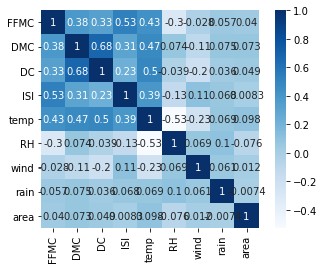

In [57]:
# lest plot he heatmap for the follwing values
sns.heatmap(forest_fires,vmax=1,square=True,annot=True,cmap="Blues")

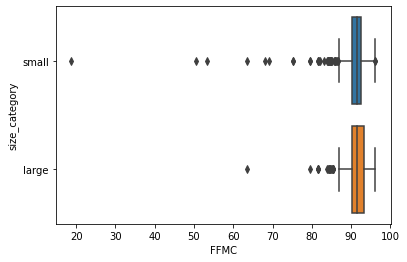

In [58]:
# lets plot the boxplot to find the influencers
sns.boxplot(data=f_f1,x='FFMC',y='size_category')
plt.show()

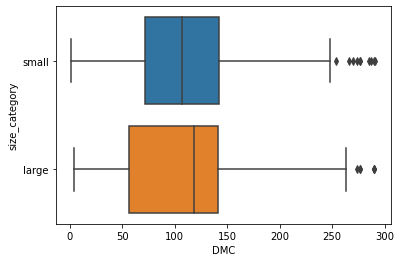

In [59]:
sns.boxplot(data=f_f1,x='DMC',y='size_category')
plt.show()

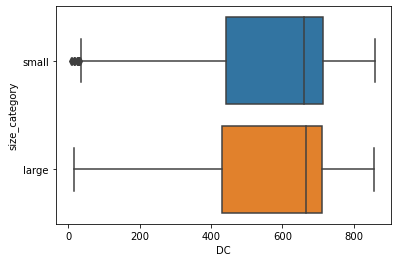

In [60]:
sns.boxplot(data=f_f1,x='DC',y='size_category')
plt.show()

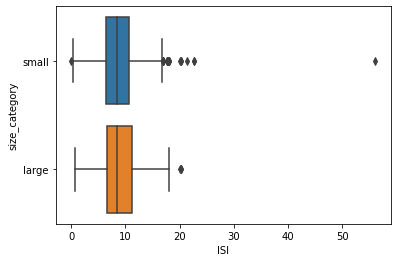

In [61]:
sns.boxplot(data=f_f1,x='ISI',y='size_category')
plt.show()

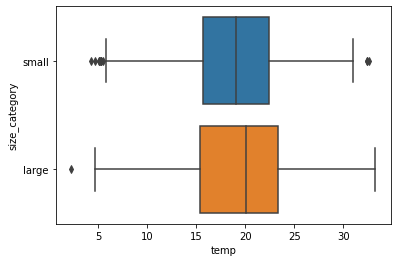

In [62]:
sns.boxplot(data=f_f1,x='temp',y='size_category')
plt.show()

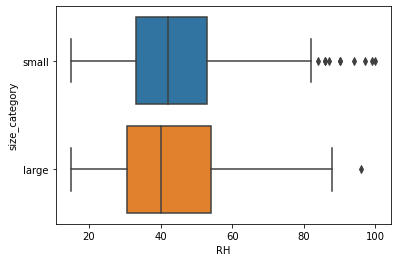

In [63]:
sns.boxplot(data=f_f1,x='RH',y='size_category')
plt.show()

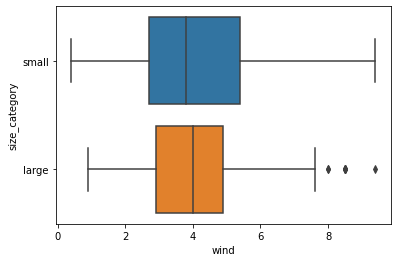

In [64]:
sns.boxplot(data=f_f1,x='wind',y='size_category')
plt.show()

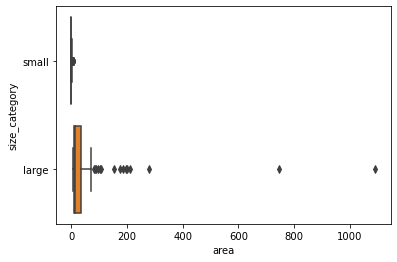

In [65]:
sns.boxplot(data=f_f1,x='area',y='size_category')
plt.show()

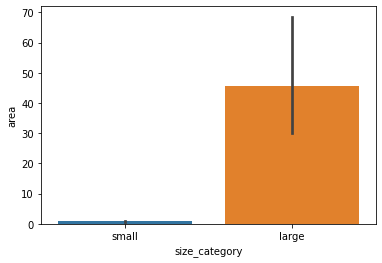

In [66]:
sns.barplot(data=f_f1,y='area',x='size_category')
plt.show()

TUNING HYPER PARAMETERS USING BATCH SIZE AND EPOCHS

In [67]:
#splitting th columns
x= final_df.iloc[:,0:28]
x

,0,1,2,3,4,5,6,7,8,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1,...,0,0,0,0,0,1,0,0,0,0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1,...,0,0,0,0,0,1,0,0,0,0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0,...,0,0,0,0,0,0,0,0,0,0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0,...,0,0,0,0,0,0,0,0,0,0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0,...,0,0,0,0,0,0,0,0,0,0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
y=final_df.iloc[:,28:]
y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


model creating type 1

In [69]:
seed = 7
import numpy
numpy.random.seed(seed)
# lets create the model
import tensorflow as tf
model1=tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(12,input_dim=28,activation='sigmoid'))
model1.add(tf.keras.layers.Dense(8,activation='sigmoid'))
model1.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [70]:
model1.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 12)                348       
                                                                 
 dense_88 (Dense)            (None, 8)                 104       
                                                                 
 dense_89 (Dense)            (None, 1)                 9         
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


model creating type 2

In [71]:
# lets check for the relu function
from keras.models import Sequential
from keras.layers import Dense,Activation
#from keras.optimizers import Adam
model=Sequential()
model.add(Dense(12,input_dim=28,kernel_initializer='uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
#adam=Adam()
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
#model.add(Dense(1,activation='sigmoid'))

In [72]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 12)                348       
                                                                 
 dense_91 (Dense)            (None, 8)                 104       
                                                                 
 dense_92 (Dense)            (None, 8)                 72        
                                                                 
 dense_93 (Dense)            (None, 1)                 9         
                                                                 
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________


In [73]:
# lets complie the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [74]:
# lets fit the model
history=model.fit(x,y,validation_split=0.20,epochs=100,batch_size=50)

Epoch 1/100
9/9 [==============================] - 1s 38ms/step - loss: 0.6923 - accuracy: 0.6707 - val_loss: 0.6913 - val_accuracy: 0.7019
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 0.6902 - accuracy: 0.7385 - val_loss: 0.6895 - val_accuracy: 0.7019
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6879 - accuracy: 0.7385 - val_loss: 0.6875 - val_accuracy: 0.7019
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 0.6856 - accuracy: 0.7385 - val_loss: 0.6854 - val_accuracy: 0.7019
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6828 - accuracy: 0.7385 - val_loss: 0.6829 - val_accuracy: 0.7019
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6797 - accuracy: 0.7385 - val_loss: 0.6800 - val_accuracy: 0.7019
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6758 - accuracy: 0.7385 - val_loss: 0.6761 - val_accuracy: 0.7019
Epoch 8/100
9/9 [=========

In [75]:
# lets evlaute the model
scores=model.evaluate(x,y)
print("%s:  %.2f%%" %(model.metrics_names[1],scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.5458 - accuracy: 0.7544
accuracy:  75.44%


In [76]:
# deofne the classifiaction model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score

def base_model():
    model=Sequential()
    model.add(Dense(12,input_dim=28,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
   # adam=Adam()
    model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
    #model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model


classifer=KerasClassifier(build_fn=base_model,verbose=0)
batch_size=[10,20,40,100]
epochs= [10,20,50,100]
grid_param= dict (batch_size=batch_size,epochs=epochs)
grid=GridSearchCV(estimator=classifer,cv=KFold(),param_grid=grid_param,verbose=10)
grid_results=grid.fit(x,y)

<ipython-input-76-5317715f6244>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifer=KerasClassifier(build_fn=base_model,verbose=0)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ....batch_size=10, epochs=10;, score=1.000 total time=   2.0s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ....batch_size=10, epochs=10;, score=0.750 total time=   2.4s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ....batch_size=10, epochs=10;, score=0.524 total time=   2.1s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ....batch_size=10, epochs=10;, score=0.680 total time=   2.0s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ....batch_size=10, epochs=10;, score=0.699 total time=   2.1s
[CV 1/5; 2/16] START batch_size=10, epochs=20...................................
[CV 1/5; 2/16] END ....batch_size=10, epochs=20;

[CV 5/5; 9/16] END ....batch_size=40, epochs=10;, score=0.699 total time=   2.4s
[CV 1/5; 10/16] START batch_size=40, epochs=20..................................
[CV 1/5; 10/16] END ...batch_size=40, epochs=20;, score=1.000 total time=   2.8s
[CV 2/5; 10/16] START batch_size=40, epochs=20..................................
[CV 2/5; 10/16] END ...batch_size=40, epochs=20;, score=0.750 total time=   2.7s
[CV 3/5; 10/16] START batch_size=40, epochs=20..................................
[CV 3/5; 10/16] END ...batch_size=40, epochs=20;, score=0.524 total time=   2.7s
[CV 4/5; 10/16] START batch_size=40, epochs=20..................................
[CV 4/5; 10/16] END ...batch_size=40, epochs=20;, score=0.680 total time=   2.7s
[CV 5/5; 10/16] START batch_size=40, epochs=20..................................
[CV 5/5; 10/16] END ...batch_size=40, epochs=20;, score=0.699 total time=   3.2s
[CV 1/5; 11/16] START batch_size=40, epochs=50..................................
[CV 1/5; 11/16] END ...batch

In [77]:
print('best:{},using{}'.format(grid_results.best_score_,grid.best_params_))


best:0.8274458646774292,using{'batch_size': 10, 'epochs': 100}


In [78]:
# visualize th training histroy

model.history.history.keys()
import matplotlib.pyplot as plt

In [79]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

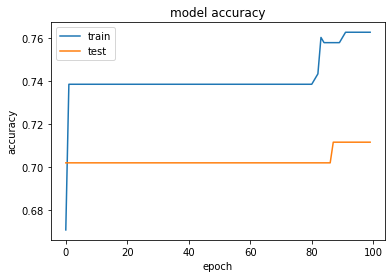

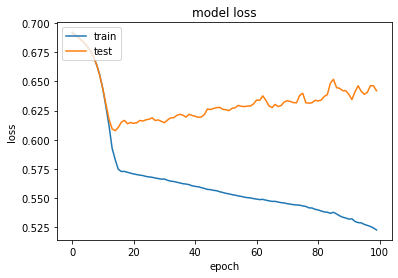

In [80]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()